In [1]:
import sys 
sys.path.append('/Users/lei/home/studyhall/modeling-rsa/lib') 
 
import pickle 
import pandas as pd 
import numpy as np 
from tqdm import tqdm 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
 
import torch
 
from preprocessor import Preprocessor 
from utils import * 
from dataset import FeatureSet 

In [2]:
corpus = load("/Users/lei/home/studyhall/modeling-rsa/dns_29_periodic_hills_dataset/alph05-4071-2024.dat")
corpus 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.06015624e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.12031249e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.03919506e+00,  2.02399993e+00, -1.85170546e-11, ...,
         9.92156222e-14,  0.00000000e+00,  9.09025029e-04],
       [ 4.04979706e+00,  2.02399993e+00,  1.56871591e-11, ...,
         4.30580193e-15,  0.00000000e+00,  9.08801160e-04],
       [ 4.06039858e+00,  2.02399993e+00,  5.56004439e-11, ...,
        -4.31572259e-14,  0.00000000e+00,  9.08638695e-04]])

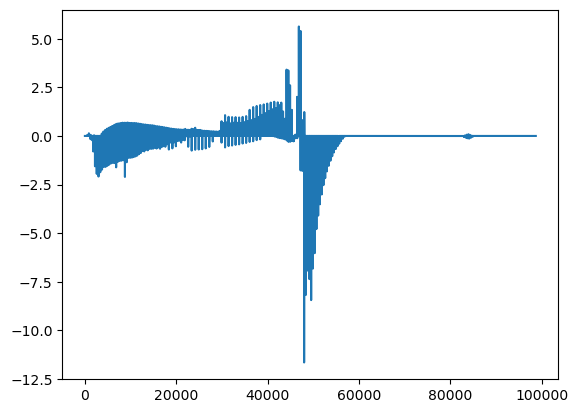

In [3]:
preprocessor = Preprocessor(corpus)
liutex_vals = [preprocessor.liutex(i) for i in range(0, len(corpus))] 
plt.plot(liutex_vals) 

In [4]:
p = Preprocessor(corpus)
features = [[p.liutex(i) ** 2, p.sheer(i) ** 2, p.liutex(i) * p.sheer(i), p.q1(i), p.q4(i), p.q6(i), p.q7(i), p.q10(i)] for i in tqdm(range(0, len(corpus)))] 
labels = [to_cs_wrapper(corpus, i) for i in tqdm(range(0, len(corpus)))] 
with open('../pk_files/corpus.pkl', 'wb') as f:
    pickle.dump((features, labels), f) 

100%|██████████| 98688/98688 [00:03<00:00, 26499.66it/s]


In [5]:
with open('../pk_files/corpus.pkl', 'rb') as f:
    (features, labels) = pickle.load(f)

In [6]:
print("feature set shape: {}".format(np.shape(features)))
print("label set shape: {}".format(np.shape(labels))) 

feature set shape: (98688, 8)
label set shape: (98688, 3)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3)
print(np.shape(X_train)) 
print(np.shape(X_val)) 
print(np.shape(y_train)) 
print(np.shape(y_val)) 

(69081, 8)
(29607, 8)
(69081, 3)
(29607, 3)


In [8]:
X_train = np.nan_to_num(X_train)
X_val = np.nan_to_num(X_val)
y_train = np.nan_to_num(y_train)
y_val = np.nan_to_num(y_val)

In [12]:
with open('../pk_files/train_test_split.pkl', 'wb') as f:
    pickle.dump((X_train, X_val, y_train, y_val), f)

In [13]:
data_train = FeatureSet(X_train, y_train, len(y_train))
data_test = FeatureSet(X_val, y_val, len(y_val))

In [14]:
with open('../pk_files/dataset.pkl', 'wb') as f:
    pickle.dump((data_train, data_test), f)